### Visualisation Final Project

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from mpl_toolkits.mplot3d import *
import ipywidgets as widgets
from ipywidgets import interact
import mplcursors
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
# Read datasets.
youtube_spotify = pd.read_csv('Spotify_Youtube.csv')
tiktok_19 = pd.read_excel('TikTok_songs_2019.xlsx')
tiktok_20 = pd.read_csv('TikTok_songs_2020.csv')
tiktok_21 = pd.read_csv('TikTok_songs_2021.csv')
tiktok_22 = pd.read_csv('TikTok_songs_2022.csv')
tiktok = pd.concat([tiktok_19, tiktok_20], ignore_index=True, sort=False)
tiktok = pd.concat([tiktok, tiktok_21], ignore_index=True, sort=False)
tiktok = pd.concat([tiktok, tiktok_22], ignore_index=True, sort=False)
tiktok.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

In [31]:
# Merge Pandas DataFrames using left_on and right_on
tracks = pd.merge(youtube_spotify, tiktok, left_on="Track", right_on="track_name")
tracks = tracks.drop(['duration_ms','artist_name','instrumentalness','liveness','valence','tempo','track_name','album','danceability','energy','loudness','mode','key','speechiness','acousticness'], axis = 1)
tracks.sort_values(by='Stream')

# Deleting duplicate songs published by the same artists in the same album
tracks = tracks.drop_duplicates(subset=['Track','Album'], keep="last")
tracks = tracks.drop_duplicates(subset=['Track','Artist'], keep="last")

In [32]:
df = tracks
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,artist_pop,track_pop,time_signature
Unnamed: 0,1.000000,0.028679,-0.096135,0.002829,0.095674,0.001457,0.089406,-0.009685,-0.025070,-0.084939,0.045195,-0.322517,-0.005346,0.155933,0.057336,0.229184,0.186915,0.121851,-0.052627
Danceability,0.028679,1.000000,0.053898,0.046763,0.141394,0.195603,-0.188145,-0.070288,-0.094334,0.377118,-0.244834,-0.162460,0.053676,0.080955,0.043671,0.034848,0.154515,0.045776,0.191146
Energy,-0.096135,0.053898,1.000000,0.065322,0.722026,0.039344,-0.557084,0.004789,0.108137,0.380989,0.070357,0.043433,0.039033,-0.018317,-0.015638,-0.056746,-0.002701,0.042476,0.053032
Key,0.002829,0.046763,0.065322,1.000000,0.007612,0.051300,-0.031836,0.043275,0.102487,0.046336,-0.031003,-0.036681,-0.060659,-0.038519,0.018789,-0.013374,-0.022704,-0.051738,0.044331
Loudness,0.095674,0.141394,0.722026,0.007612,1.000000,0.017083,-0.471966,-0.098761,0.067078,0.227226,0.055630,-0.023367,0.132417,0.131648,0.059627,0.092062,0.099670,0.065273,0.029550
Speechiness,0.001457,0.195603,0.039344,0.051300,0.017083,1.000000,-0.015787,-0.032405,-0.007307,0.010093,0.094090,-0.067481,-0.056209,-0.029694,0.006753,-0.069827,0.082200,-0.069602,0.026713
Acousticness,0.089406,-0.188145,-0.557084,-0.031836,-0.471966,-0.015787,1.000000,0.116438,-0.069720,-0.212302,-0.012196,-0.049530,-0.071277,-0.055854,-0.071899,0.029290,-0.056247,-0.015110,-0.098397
Instrumentalness,-0.009685,-0.070288,0.004789,0.043275,-0.098761,-0.032405,0.116438,1.000000,-0.003038,-0.046277,-0.006654,0.022594,-0.088163,-0.099373,-0.033901,-0.107755,-0.075428,0.018450,-0.108905
Liveness,-0.025070,-0.094334,0.108137,0.102487,0.067078,-0.007307,-0.069720,-0.003038,1.000000,-0.031344,0.001658,0.011369,-0.022480,0.024057,-0.013558,0.031273,0.032237,-0.032233,-0.038956
Valence,-0.084939,0.377118,0.380989,0.046336,0.227226,0.010093,-0.212302,-0.046277,-0.031344,1.000000,0.004850,-0.114312,-0.045074,-0.035055,0.027642,-0.060659,0.036036,0.095775,0.113994


In [33]:
#Removing features from dataframe.

features = tracks.columns[7:].tolist()
features.remove('Description')
features.remove('Channel')
features.remove('Comments')
features.remove('Url_youtube')
features.remove('Title')
features.remove('official_video')
features.remove('Stream')
features.remove('artist_pop')
features.remove('track_pop')
features.remove('Views')
features.remove('Likes')
features.remove('Licensed')
features.remove('time_signature')
features.remove('Tempo')
features.remove('Duration_ms')
features.remove('Key')
features.remove('Loudness')

### Task 1

In [45]:
# However in this case we are only looking at a subset of the features available, we are excluding tempo, duration and loudness


def f(Size, Platform):
    # Features. 
    fig = plt.figure(figsize=(9,5))
    ax = fig.add_subplot()
    size = Size
    platform = Platform

    if platform == 'TikTok':
        top_songs = tiktok.sort_values(by='track_pop',ascending=False).dropna()
        attributes = [feature.lower() for feature in features]
        color = '#EE1D52'
    elif platform == 'YouTube':
        color = '#c4302b'
        attributes = features
        top_songs = youtube_spotify.sort_values(by='Likes',ascending=False).dropna()
    elif platform == 'Spotify':
        color = '#1DB954'
        attributes = features
        top_songs = youtube_spotify.sort_values(by='Stream',ascending=False).dropna()

    if Platform == 'TikTok':
        songs = top_songs['track_name'][:size]
        artists = top_songs['artist_name'][:size]
    else:
        songs = top_songs['Track'][:size]
        artists = top_songs['Artist'][:size]

    # Plot.
    features_dict = {}
    for feature in attributes:
        features_dict[feature] = top_songs[feature][:size]
    ax.boxplot(features_dict.values(),patch_artist=True,
            boxprops=dict(facecolor=color, color=color),medianprops=dict(color='white'))
    ax.set_xticklabels([feature.capitalize() for feature in features])
    ax.set_title('Features distribution for the top '+ str(size) + ' songs on '+ platform);
    ax.yaxis.grid(alpha=0.3)
    
    ax.set_yticks(np.arange(0,1.05,0.1))
    ax.set_ylabel('Value', size=12)
    ax.set_xlabel('Features', size=12)

    fig.tight_layout()
    fig.canvas.draw()

    
interact(f, Size=widgets.IntSlider(min=1, max=len(tracks), step=1, value=10), Platform=['TikTok','Spotify','YouTube'])

interactive(children=(IntSlider(value=10, description='Size', max=494, min=1), Dropdown(description='Platform'…

<function __main__.f(Size, Platform)>

C:\Users\Giulio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Giulio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Giulio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Giulio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Giulio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


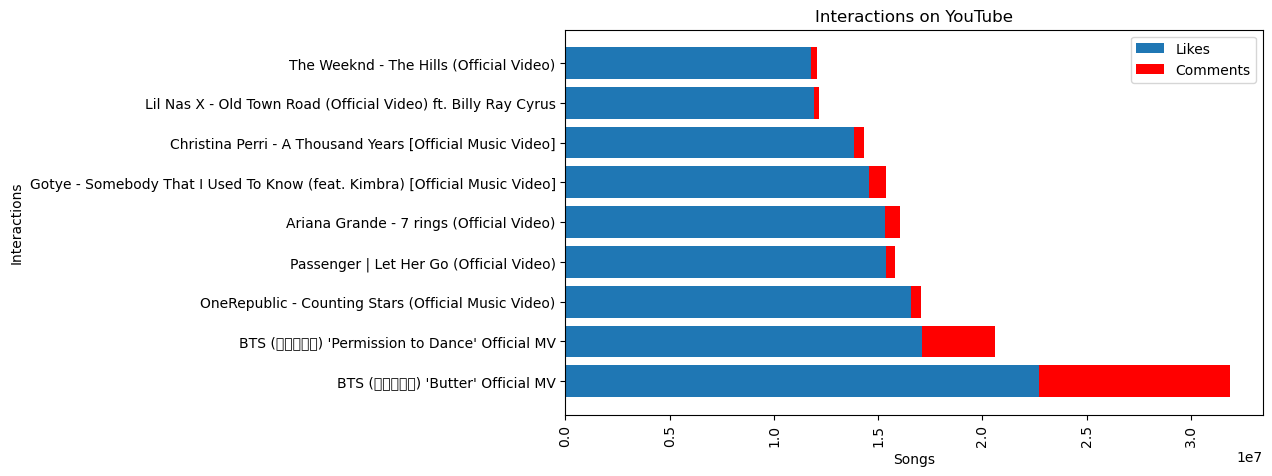

In [46]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()
size = 10
# create data
top_songs = tracks.sort_values(by='Likes',ascending=False).dropna()
top_songs = top_songs[1:size]
x = top_songs['Title'].to_list()
y1 = top_songs['Likes'].to_list()
y2 = top_songs['Comments'].to_list()
 
# plot bars in stack manner
ax.barh(x, y1);
ax.barh(x, y2, left=y1,color='red');
ax.set_xlabel("Songs");
ax.set_ylabel("Interactions");
ax.legend(["Likes", "Comments"]);
ax.set_title("Interactions on YouTube");
plt.xticks(rotation = 90);

## Task 3

In [10]:
#tracks

In [48]:
###
def f(Number):

    index_tktk = 'track_pop'
    index_ytb = 'Likes'
    index_sptf = 'Stream'

    top_songs_t = tracks.sort_values(by=index_tktk,ascending=False).dropna()
    top_songs_t = top_songs_t[1:Number]
    types = top_songs_t['Album_type'].unique()
    
    top_songs_y = youtube_spotify.sort_values(by=index_ytb,ascending=False).dropna()
    top_songs_y = top_songs_y[1:Number]
    types = top_songs_y['Album_type'].unique()
    
    top_songs_s = youtube_spotify.sort_values(by=index_sptf,ascending=False).dropna()
    top_songs_s = top_songs_s[1:Number]
    types = top_songs_s['Album_type'].unique()
    
    dict_t = {}
    dict_y = {}
    dict_s = {}
    for type in types:
        dict_t[type] = len(top_songs_t[top_songs_t['Album_type']==type])
        dict_y[type] = len(top_songs_y[top_songs_y['Album_type']==type])
        dict_s[type] = len(top_songs_s[top_songs_s['Album_type']==type])
        
    fig = plt.figure(figsize=(9,5))
    ax = fig.subplots(nrows=1, ncols=3)

    ax[0].pie(dict_t.values(), labels=dict_t.keys(),autopct='%1.1f%%')
    ax[0].set_title('Album type for the top '+str(Number)+' songs on TikTok', size = 7)
    ax[1].pie(dict_s.values(), labels=dict_s.keys(),autopct='%1.1f%%')
    ax[1].set_title('Album type for the top '+str(Number)+' songs on Spotify', size = 7)
    ax[2].pie(dict_y.values(), labels=dict_y.keys(),autopct='%1.1f%%')
    ax[2].set_title('Album type for the top '+str(Number)+' songs on Youtube', size = 7)
    
    ax[0].legend(loc='upper right', prop={'size': 6})
    ax[1].legend(loc='upper right', prop={'size': 6})
    ax[2].legend(loc='upper right', prop={'size': 6})
    
interact(f,Number=widgets.IntSlider(min=50, max=len(tracks), step=1, value=1))

interactive(children=(IntSlider(value=50, description='Number', max=494, min=50), Output()), _dom_classes=('wi…

<function __main__.f(Number)>